In [1]:
#TODO: import the modules
import pandas as pd
import numpy as np
import matplotlib as pl
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV

In [2]:


features_main = ['SheriffCaseNumber', 'CurrentSalesDate', 'Plaintiff', 'PropertyAddress']
features_detail = ['SheriffCaseNumber', 'AmountOwed', 'Attorney', 'InitialSalesDate']


file_path_maintable = 'C:\\Users\\Rubens Titus\\Documents\\SETON_HALL_UNIVERSITY\\SPRING_2022\\DASC8211-MACHINE-LEARNING\\ML_project\\maintable.csv'
file_path_detailtable = 'C:\\Users\\Rubens Titus\\Documents\\SETON_HALL_UNIVERSITY\\SPRING_2022\\DASC8211-MACHINE-LEARNING\\ML_project\\detailtable.csv'

main = pd.read_csv(file_path_maintable, index_col='SheriffCaseNumber', usecols=features_main)
detail = pd.read_csv(file_path_detailtable, index_col='SheriffCaseNumber', usecols=features_detail, dtype={'AmountOwed': np.float64})

#Although the raw main table contain Property owners' names I deem it to be of little value.
#SheriffCaseNumber allows joining of tables


In [3]:
#SNIP VIEW OF THE DATA TABLES

In [4]:
main.info()
#null is not expected since the data was scraped off the internet using Google Chrome web scrapper extension

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, CH-17004760 to CH-22000753
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CurrentSalesDate  125 non-null    object
 1   Plaintiff         125 non-null    object
 2   PropertyAddress   125 non-null    object
dtypes: object(3)
memory usage: 3.9+ KB


In [5]:
detail.info()
#main table has the same number of rows as the detail table

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, CH-21002211 to CH-22000593
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AmountOwed        125 non-null    float64
 1   Attorney          125 non-null    object 
 2   InitialSalesDate  125 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.9+ KB


In [6]:
main.describe()
#returns no duplicate in property address
#several properties are scheduled or sold on the same sales date
#indicates that plaintiffs have more than one properties in foreclosure proceedings as expected

,CurrentSalesDate,Plaintiff,PropertyAddress
count,125,125,125
unique,12,106,125
top,5/18/2022,"SANTANDER BANK, N.A.",437 COOLIDGE DRIVE KENILWORTH NJ 07033
freq,23,4,1


In [7]:
#COMBINING DATA TABLES BASED ON INDEX

In [8]:
main.index

Index(['CH-17004760', 'CH-19002763', 'CH-21002321', 'CH-21002322',
       'CH-21002323', 'CH-21002325', 'CH-21002326', 'CH-21002334',
       'CH-21002437', 'CH-21002452',
       ...
       'CH-22000554', 'CH-22000596', 'CH-22000086', 'CH-22000589',
       'CH-22000590', 'CH-21002211', 'CH-22000504', 'CH-22000676',
       'CH-22000748', 'CH-22000753'],
      dtype='object', name='SheriffCaseNumber', length=125)

In [9]:
detail.index

Index(['CH-21002211', 'CH-18003120', 'CH-22000753', 'CH-22000542',
       'CH-18003544', 'CH-22000537', 'CH-22000223', 'CH-22000167',
       'CH-22000333', 'CH-22000532',
       ...
       'CH-21002322', 'CH-22000157', 'CH-22000457', 'CH-21002130',
       'CH-22000596', 'CH-22000553', 'CH-21002334', 'CH-16001804',
       'CH-21002435', 'CH-22000593'],
      dtype='object', name='SheriffCaseNumber', length=125)

In [10]:
 main_detail = detail.join(main, how='outer')

In [11]:
#Keep the zip code only
# new data frame with split value columns
new = main_detail["PropertyAddress"].str.split("NJ ", n = 1, expand = True)
main_detail["ZipCode"]= new[1]
del main_detail['PropertyAddress']
# df display
main_detail.head()

,AmountOwed,Attorney,InitialSalesDate,CurrentSalesDate,Plaintiff,ZipCode
SheriffCaseNumber,,,,,,
CH-16001804,212687.0,"KML LAW GROUP, P.C.",6/1/2016,6/8/2022,ONEWEST BANK N.A.,07060
CH-17002156,93397.0,"STERN & EISENBERG, PC",7/26/2017,6/1/2022,"U.S. BANK TRUST, N.A., AS TRUSTEE FOR LSF9 MAS...",07065
CH-17004013,258791.0,"FRENKEL LAMBERT WEISS WEISMAN & GORDON, LLP",11/8/2017,6/8/2022,"CIT BANK, N.A.",07205
CH-17004760,373228.0,"PHELAN HALLINAN DIAMOND & JONES, PC",1/10/2018,5/18/2022,FEDERAL NATIONAL MORTGAGE,07033
CH-18001400,139264.0,PARKER MC CAY - ATTORNEYS,6/6/2018,6/15/2022,JP MORGAN MORTGAGE ACQUISITION CORP.,07203


In [12]:
main_detail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, CH-16001804 to CH-22000846
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AmountOwed        125 non-null    float64
 1   Attorney          125 non-null    object 
 2   InitialSalesDate  125 non-null    object 
 3   CurrentSalesDate  125 non-null    object 
 4   Plaintiff         125 non-null    object 
 5   ZipCode           124 non-null    object 
dtypes: float64(1), object(5)
memory usage: 6.8+ KB


In [13]:
#create a new feature called DurationOnFList

main_detail['InitialSalesDate'] = pd.to_datetime(main_detail['InitialSalesDate'])
main_detail['CurrentSalesDate'] = pd.to_datetime(main_detail['CurrentSalesDate'])

main_detail["DurationOnFList"] = main_detail["CurrentSalesDate"] - main_detail["InitialSalesDate"]


In [14]:
main_detail['DurationOnFList'] = pd.to_numeric(main_detail['DurationOnFList'].dt.days, downcast='integer')

In [15]:
main_detail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, CH-16001804 to CH-22000846
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   AmountOwed        125 non-null    float64       
 1   Attorney          125 non-null    object        
 2   InitialSalesDate  125 non-null    datetime64[ns]
 3   CurrentSalesDate  125 non-null    datetime64[ns]
 4   Plaintiff         125 non-null    object        
 5   ZipCode           124 non-null    object        
 6   DurationOnFList   125 non-null    int16         
dtypes: datetime64[ns](2), float64(1), int16(1), object(3)
memory usage: 7.1+ KB


In [16]:
#MAKE TARGET VARIABLE 3 LABEL
conditions = [
    (main_detail['DurationOnFList'] <= 180),
    (main_detail['DurationOnFList'] > 180) & (main_detail['DurationOnFList'] <= 1000),
    (main_detail['DurationOnFList'] > 1000)]

# create a list of the values we want to assign for each condition
values = ['short', 'average', 'long']

# create a new column and use np.select to assign values to it using our lists as arguments
main_detail['DurationLabel'] = np.select(conditions, values)
#drop the DurationOnFlist as no longer needed
del main_detail['DurationOnFList']

In [17]:
del main_detail['InitialSalesDate']
del main_detail['CurrentSalesDate']

In [18]:
 
#test_main_detail['A', 'weight'] = main_detail['Attorney'].value_counts()

In [20]:
E#test_main_detail.dtype

NameError: name 'E' is not defined

In [21]:
# dropping null value columns to avoid errors
main_detail.dropna(inplace = True)

In [22]:
#assign the input features to a variable called 'X' and the labels in a variable called 'y'
X = main_detail.iloc[:,[0, 3]].to_numpy() #input features
y = main_detail.iloc[:,4].tolist() #labels

In [23]:
main_detail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, CH-16001804 to CH-22000846
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AmountOwed     124 non-null    float64
 1   Attorney       124 non-null    object 
 2   Plaintiff      124 non-null    object 
 3   ZipCode        124 non-null    object 
 4   DurationLabel  124 non-null    object 
dtypes: float64(1), object(4)
memory usage: 5.8+ KB


In [24]:
seed = 30 #integer for the random number generator.

#Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30 , #provide the test_size
                                                    random_state = seed, #seed the random generator for reproducibilty
                                                    stratify = y #TODO: provide the variable
                                                   )

#Note: X_train and y_train are the input features and labels for the training set respectively.
#Note: X_test and y_test are the input features and labels for the test set respectively.

In [25]:
#Instantiate the Decision Tree Classifier object 
dt_classifier = DecisionTreeClassifier(criterion= 'gini', #TODO: choose either 'gini' or 'entropy'
                                       max_depth= 5 #TODO: set the value (refer to the instructions above)
                                      )

#TODO: Train Decision Tree Classifier using the `fit` method
dt_classifier_trained = dt_classifier.fit(X_train, y_train)

#TODO: Make predictions with `X_test` and store the result in a variable called `y_pred`
y_pred = dt_classifier_trained.predict(X_test)

In [26]:
#STEP 4
dt_estimator = DecisionTreeClassifier()

In [27]:
params = {
    'criterion': ['gini', 'entropy'], #a list of options for criterion.
    'max_depth': [5, 7, 14], #TODO: provide a list of three numbers between 5 and 15 inclusive.
    'min_samples_split': [120, 140, 201, 275, 299, 340, 402, 460, 483, 499] #TODO: provide a list of ten numbers between 100 and 500.
}

In [28]:
rand_search = RandomizedSearchCV(estimator=dt_estimator, 
                                 param_distributions=params, 
                                 random_state=7, 
                                 scoring='accuracy', 
                                 verbose=3, #display messages while training
                                 n_iter=350 ,#TODO: set n_iter to a value between 50 and 100
                                 cv=10) #TODO: set the number of folds to 10 for the cross validation


estimator = rand_search.fit(X_train, y_train)


print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_) #note: if the score is low, increase n_iter or adjust the values in step 5.

C:\Users\Rubens Titus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 60 is smaller than n_iter=350. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Rubens Titus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV 1/10] END criterion=gini, max_depth=5, min_samples_split=120;, score=0.889 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=5, min_samples_split=120;, score=0.889 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=5, min_samples_split=120;, score=0.889 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=5, min_samples_split=120;, score=0.889 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=5, min_samples_split=120;, score=0.889 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=5, min_samples_split=120;, score=0.889 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=5, min_samples_split=120;, score=0.875 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=5, min_samples_split=120;, score=0.875 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=5, min_samples_split=120;, score=0.875 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=5, min_samples

In [29]:
#Instantiate the Decision Tree Classifer object 
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', #TODO: use the value from the random search results.
                                       max_depth= 14 ,#TODO: use the value from the random search results.
                                       min_samples_split= 120 #TODO: use the value from the random search results.
                                      )

#Train Decision Tree Classifer using the `fit` method
dt_classifier.fit(X_train, y_train)

#Make predictions with `X_test` and store the result in a variable called `y_pred
y_pred = dt_classifier.predict(X_test)

In [30]:
#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
print("The Accuracy Score:",metrics.accuracy_score(y_test, y_pred))

The Accuracy Score: 0.8947368421052632


[Ellipsis]

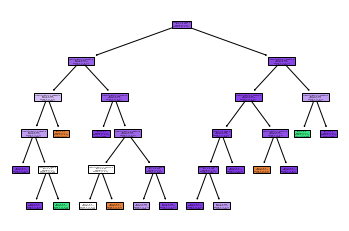

In [31]:
#TODO: Display the decision tree
tree.plot_tree(dt_classifier_trained, feature_names = ['AmountOwed', 'ZipCode'], 
               class_names=['short', 'average', 'long'],
               filled = True)
[...]

In [ ]:
#Step 10 – 
#Low income neighborhoods are grouped together by attorneys'office. Those
#properties there spend generally less time on the foreclosure list then 
#properties in affluent neighborhoods. There are biases.